<a href="https://colab.research.google.com/github/Benjamindavid03/MachineLearningLab/blob/main/Clustering_using_Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering using GMM

In [8]:
import pandas as pd
#import matplotlib as plt
from matplotlib import pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/Benjamindavid03/MachineLearningLab/main/data.csv')
data

,68.125,59.645
0,50.152,951.115
1,12.600,58.100
2,95.150,135.010
3,12.600,58.100
4,32.300,95.150
5,68.150,98.645
6,68.150,98.645
7,58.152,91.115


In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(n_components=3)

In [10]:
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame

,68.125,59.645
0,50.152,951.115
1,12.600,58.100
2,95.150,135.010
3,12.600,58.100
4,32.300,95.150
5,68.150,98.645
6,68.150,98.645
7,58.152,91.115


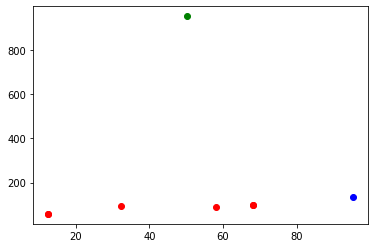

In [11]:
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']
color = ['Blue', 'Green', 'Red']
for k in range (0,3):
  data = frame[frame["cluster"] == k]
  plt.scatter(data["Weight"],data["Height"],c=color[k])

# References

1. https://python-course.eu/machine-learning/expectation-maximization-and-gaussian-mixture-models-gmm.php
2. https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f
3. http://www.cs.columbia.edu/~smaskey/CS6998-0412/slides/week3_statnlp_web.pdf
4. https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/

